In [1]:
import os
import re
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def get_concurrency_parallelism(cc_value):
    value = int(sqrt(cc_value))
    return value, value

def process_log_files(directory,string):
    dataframes = []
    for filename in os.listdir(directory):
        if filename.startswith(string) and filename.endswith(".log"):
            full_path = os.path.join(directory, filename)
            if os.stat(full_path).st_size == 0:
                print(f"Skipping empty file: {filename}")
                continue
            with open(full_path, 'r') as file:
                data = []
                last_non_zero_throughput = None
                for line in file:
                    match = re.search(r'(\d+\.\d+).*Throughput @(\d+\.\d+)s:\s+(\d+\.\d+)Gbps, lossRate: (\d+\.\d+|\d+)\s+parallelism:(\d+)\s+concurrency:(\d+)\s+score:(-?\d+\.\d+)\s+rtt:(\d+\.\d+) ms energy:(\d+\.\d+) Jules s-plr:([\deE.-]+)', line)
                    if match:
                        time = datetime.fromtimestamp(float(match.group(1)))
                        throughput = float(match.group(3))
                        loss_rate = float(match.group(4))
                        parallelism = int(match.group(5))
                        concurrency = int(match.group(6))
                        score = float(match.group(7))
                        rtt = float(match.group(8))
                        energy = float(match.group(9))
                        sender_lr = float(match.group(10))
                        data.append([time, throughput, loss_rate, parallelism, concurrency, score, rtt, energy, sender_lr])

                if data:
                    df = pd.DataFrame(data, columns=['Time', 'Throughput', 'LossRate', 'Parallelism', 'Concurrency', 'Score', 'RTT', 'Energy', 'SenderLR'])
                    dataframes.append(df)
                else:
                    print(f"No valid data in file: {filename}")
    return dataframes

The history saving thread hit an unexpected error (OperationalError('no such table: history')).History will not be written to the database.


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-o1_vxz22 because the default path (/users/jamilm/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


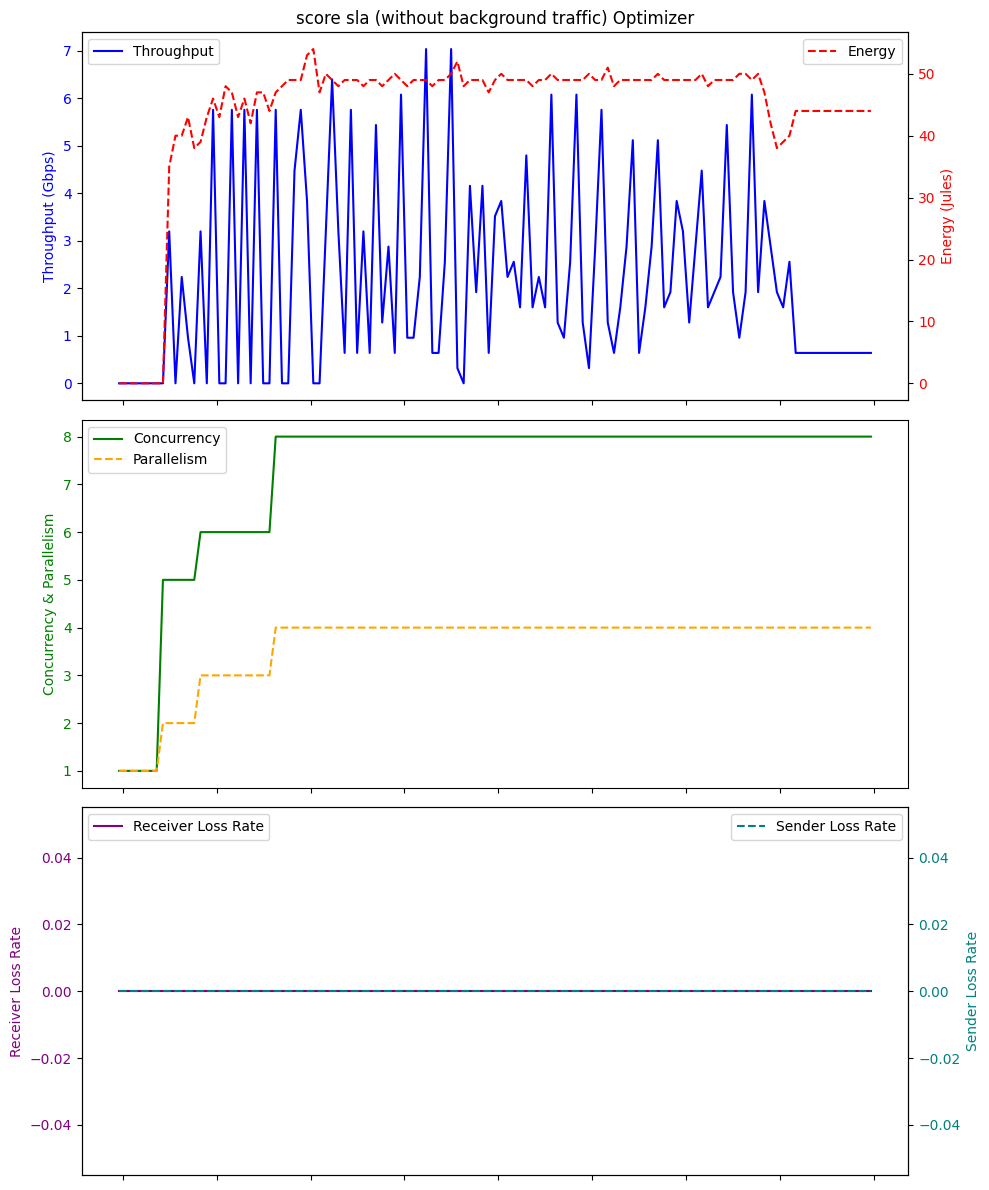

Average Throughput: 2.173884297520661
Total Energy: 44.13223140495868
Total loss rate: 0.0


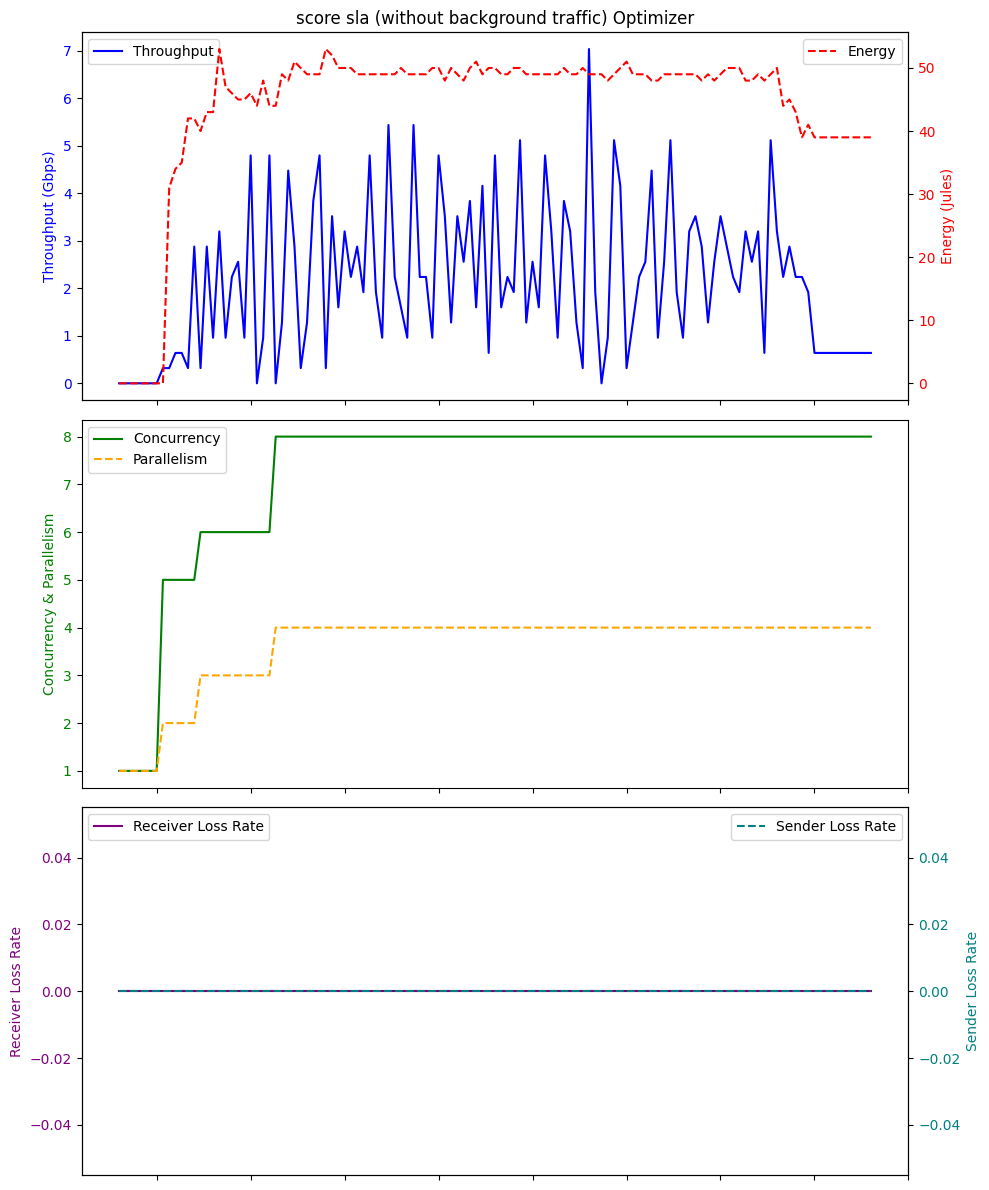

Average Throughput: 2.142148760330579
Total Energy: 43.93388429752066
Total loss rate: 0.0


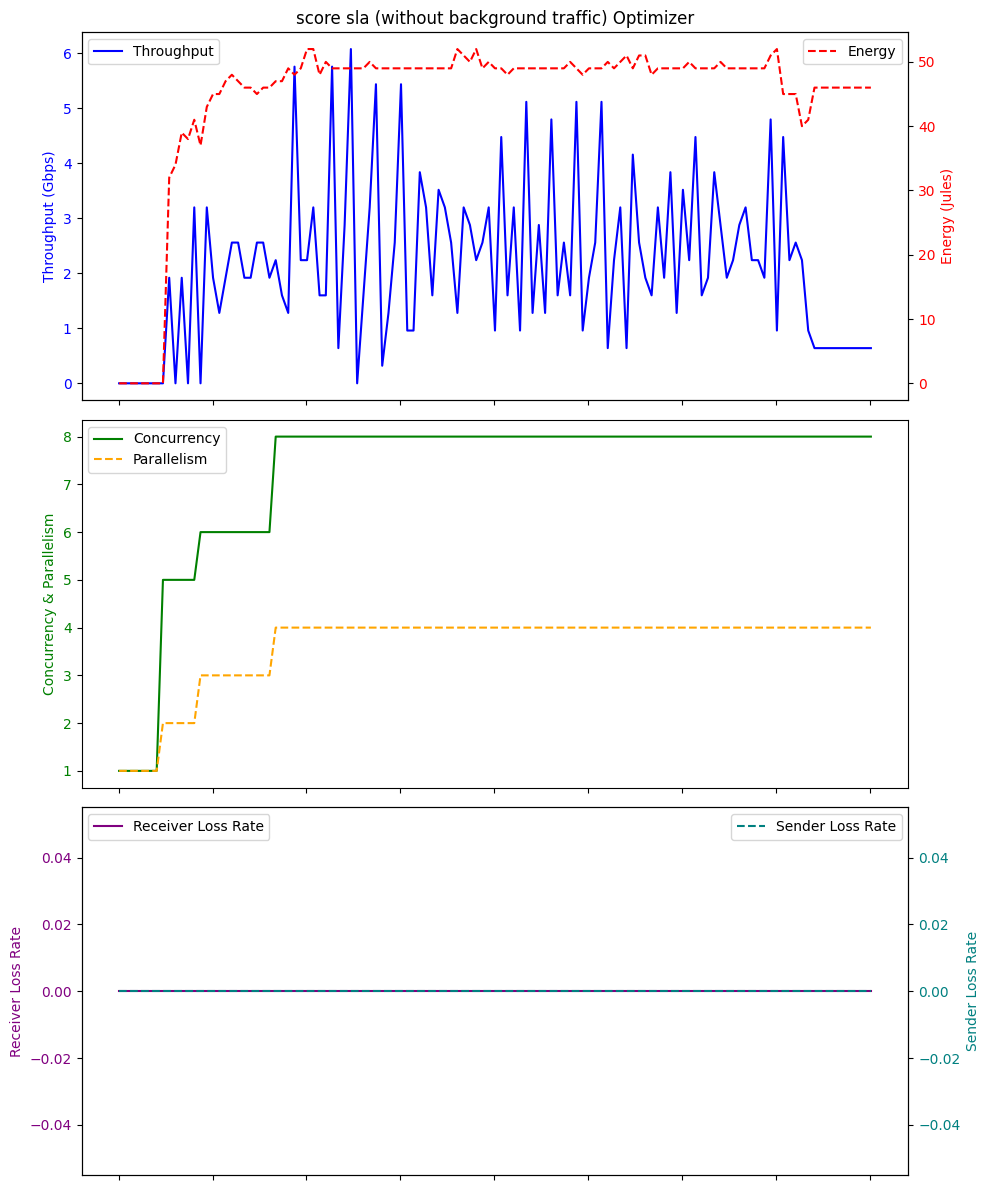

Average Throughput: 2.152727272727273
Total Energy: 44.586776859504134
Total loss rate: 0.0


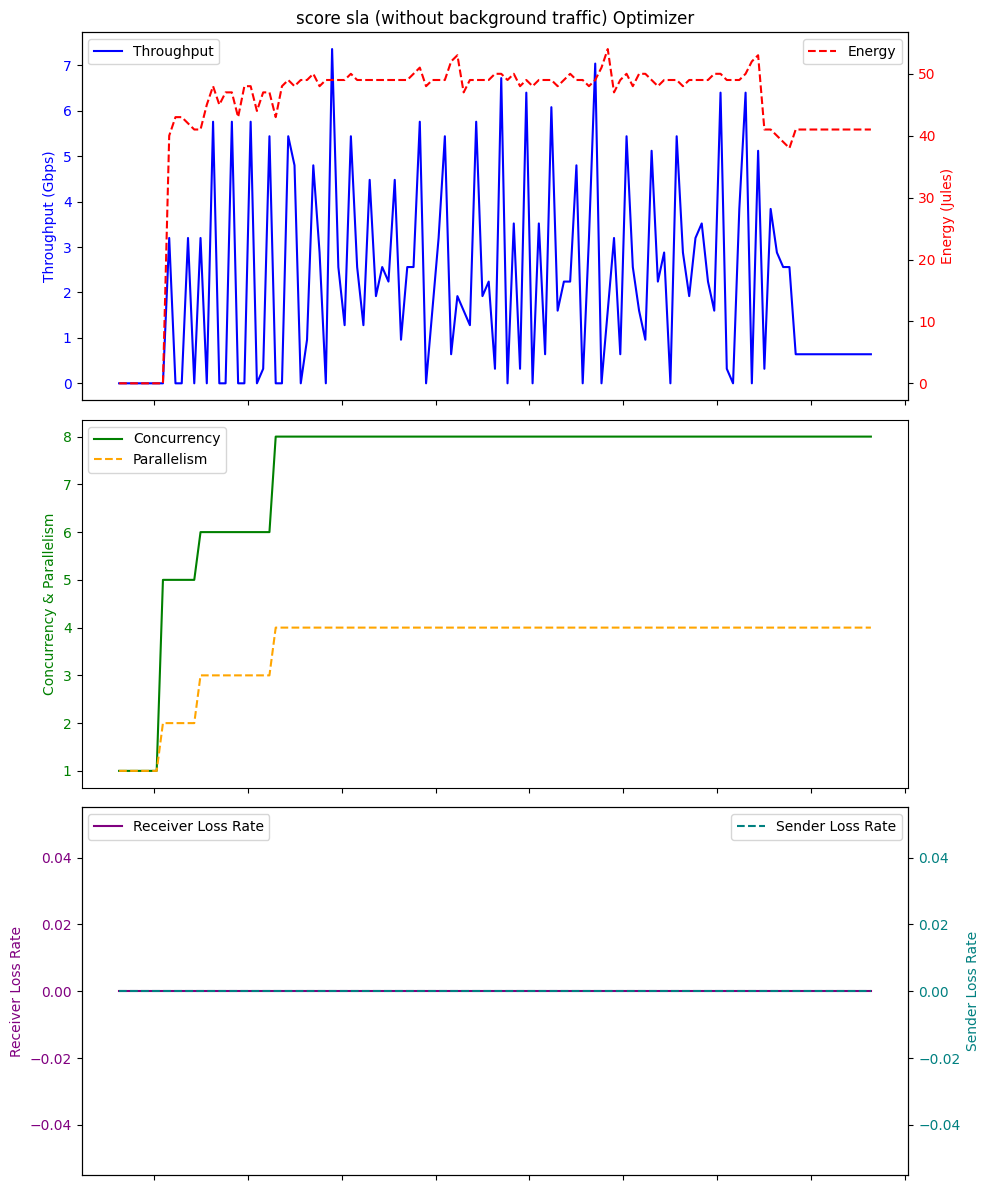

Average Throughput: 2.176528925619835
Total Energy: 44.03305785123967
Total loss rate: 0.0


In [2]:
# Example usage score sla
directory = './logFileDir/ppo_score_sla_MA_ID/'
dfs = process_log_files(directory,"ppo_score_sla_MA_ID_")

ppo_score_sla_MA_ID_throughput_list=[]
ppo_score_sla_MA_ID_energy_list=[]
ppo_score_sla_MA_ID_plr_list=[]
# Print or process the dataframes as needed
for df in dfs:
    # print(df)
    # Plotting
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)


    # Top plot with Throughput and Energy
    ax1.plot(df['Time'], df['Throughput'], label='Throughput', color='blue')
    ax1.set_ylabel('Throughput (Gbps)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title('score sla (without background traffic) Optimizer')

    ax2_twin = ax1.twinx()
    ax2_twin.plot(df['Time'], df['Energy'], label='Energy', color='red', linestyle='--')
    ax2_twin.set_ylabel('Energy (Jules)', color='red')
    ax2_twin.tick_params(axis='y', labelcolor='red')

    # Bottom plot with Concurrency, Parallelism, and CC
    ax2.plot(df['Time'], df['Concurrency'], label='Concurrency', color='green')
    ax2.plot(df['Time'], df['Parallelism'], label='Parallelism', color='orange', linestyle='--')
    ax2.set_ylabel('Concurrency & Parallelism', color='green')
    ax2.tick_params(axis='y', labelcolor='green')



    # Bottom plot with Receiver Loss Rate and Sender Loss Rate
    ax3.plot(df['Time'], df['LossRate'], label='Receiver Loss Rate', color='purple', linestyle='-')
    ax3.set_ylabel('Receiver Loss Rate', color='purple')
    ax3.tick_params(axis='y', labelcolor='purple')

    ax4_twin = ax3.twinx()
    ax4_twin.plot(df['Time'], df['SenderLR'], label='Sender Loss Rate', color='teal', linestyle='--')
    ax4_twin.set_ylabel('Sender Loss Rate', color='teal')
    ax4_twin.tick_params(axis='y', labelcolor='teal')

    # Formatting the x-axis to show time correctly
#     ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: (datetime.min + timedelta(seconds=x)).strftime('%H:%M:%S')))
#     ax2.set_xticklabels([])
    ax1.set_xticklabels([])
    ax2.set_xticklabels([])
    # Fix for overlapping layouts
    fig.tight_layout()

    # Legend
    ax1.legend(loc='upper left')
    ax2_twin.legend(loc='upper right')
    ax2.legend(loc='upper left')
    ax3.legend(loc='upper left')
    ax4_twin.legend(loc='upper right')
#     plt.savefig('withBT.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

    average_throughput = df['Throughput'].mean()
    print("Average Throughput:", average_throughput)
    total_energy = df['Energy'].mean()
    print("Total Energy:", total_energy)
    total_plr = df['SenderLR'].mean()
    print("Total loss rate:", total_plr)

    ppo_score_sla_MA_ID_throughput_list.append(average_throughput)
    ppo_score_sla_MA_ID_energy_list.append(total_energy)
    ppo_score_sla_MA_ID_plr_list.append(total_plr)

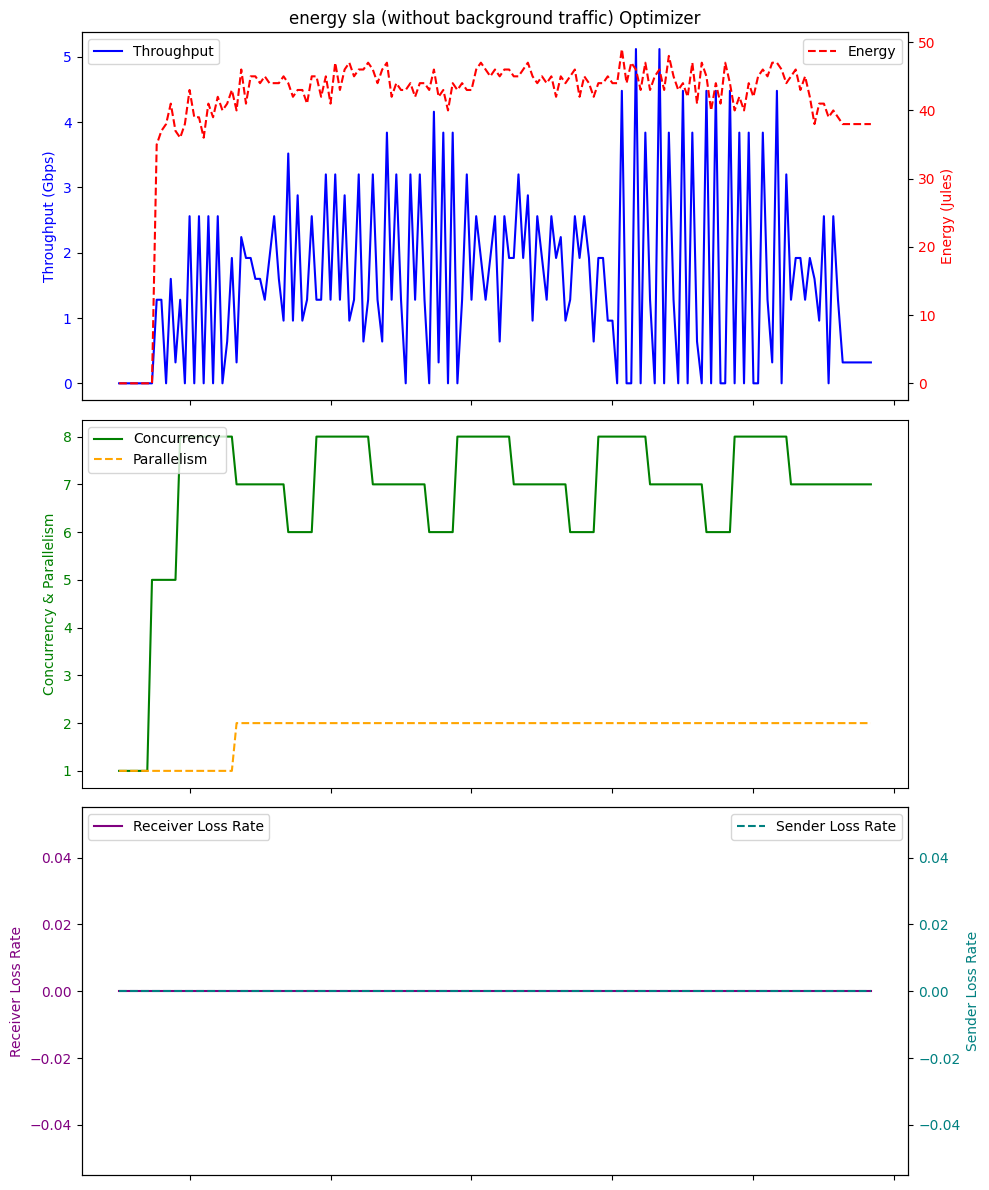

Average Throughput: 1.5900621118012421
Total Energy: 41.11180124223603
Total loss rate: 0.0


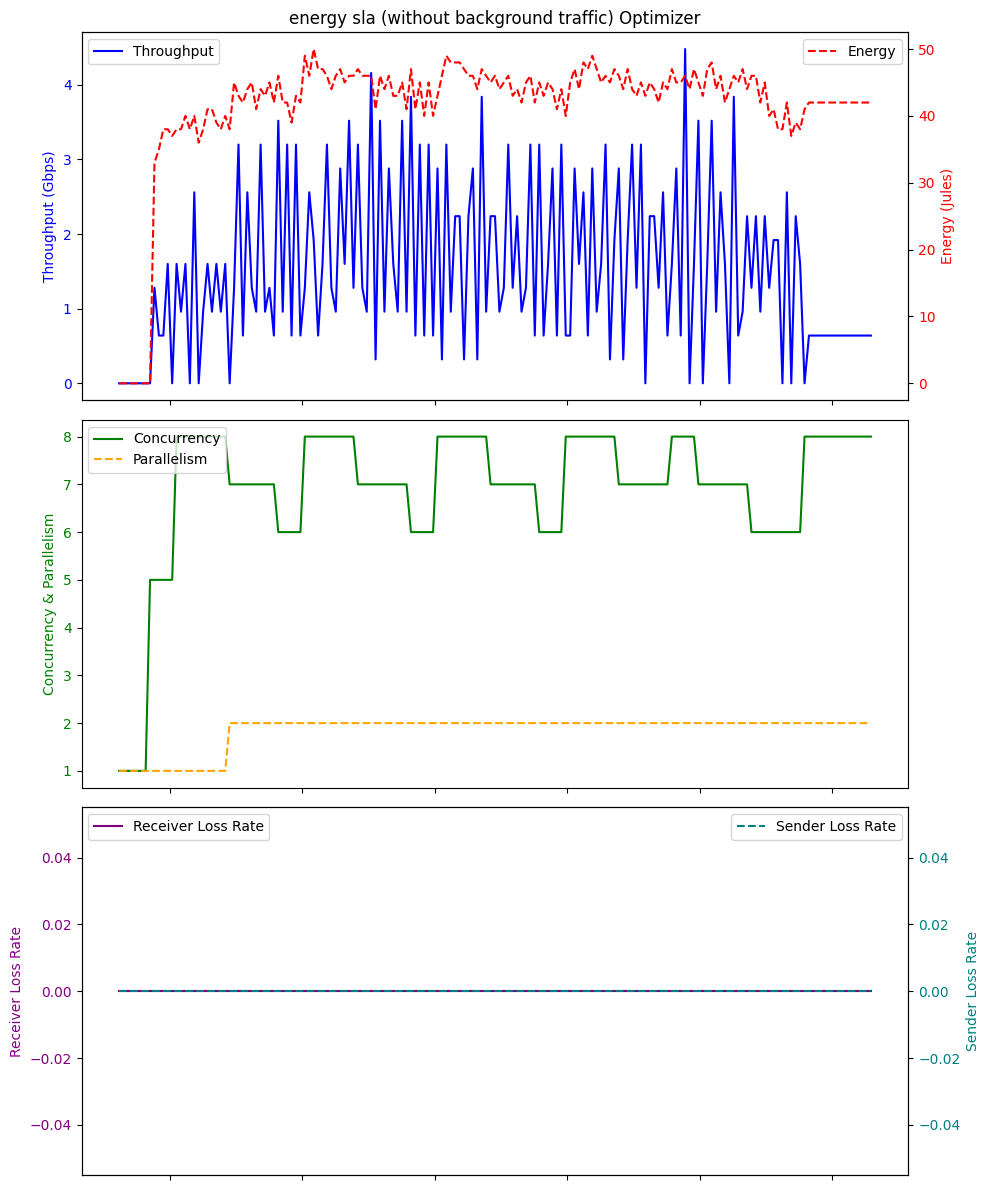

Average Throughput: 1.5326315789473683
Total Energy: 41.47953216374269
Total loss rate: 0.0


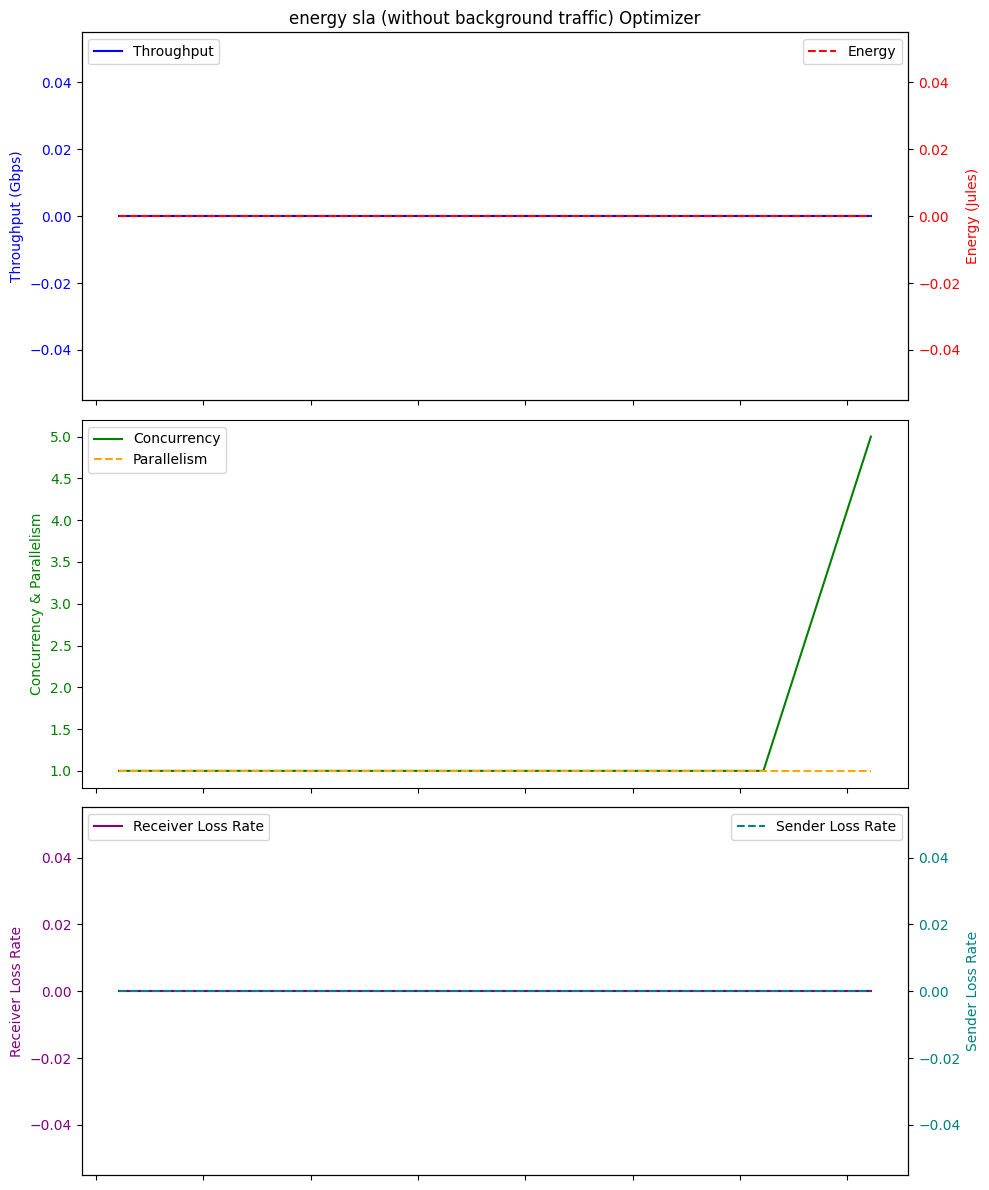

Average Throughput: 0.0
Total Energy: 0.0
Total loss rate: 0.0


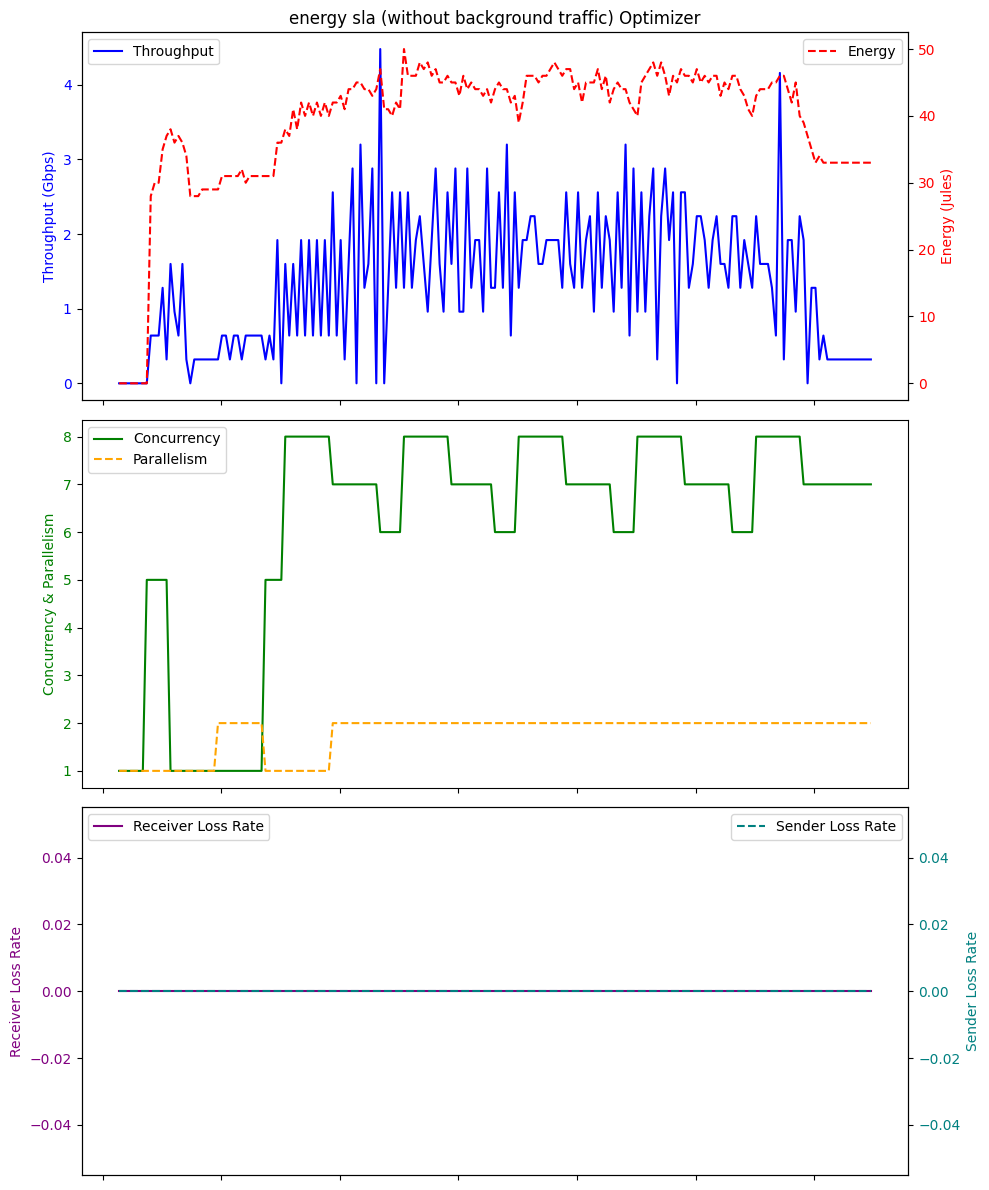

Average Throughput: 1.355392670157068
Total Energy: 39.09424083769633
Total loss rate: 0.0


In [3]:
directory = './logFileDir/ppo_energy_sla_MA_ID/'
dfs = process_log_files(directory,"ppo_energy_sla_MA_ID_")

ppo_energy_sla_MA_ID_throughput_list=[]
ppo_energy_sla_MA_ID_energy_list=[]
ppo_energy_sla_MA_ID_plr_list=[]
# Print or process the dataframes as needed
for df in dfs:
    # print(df)
    # Plotting
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)


    # Top plot with Throughput and Energy
    ax1.plot(df['Time'], df['Throughput'], label='Throughput', color='blue')
    ax1.set_ylabel('Throughput (Gbps)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title('energy sla (without background traffic) Optimizer')

    ax2_twin = ax1.twinx()
    ax2_twin.plot(df['Time'], df['Energy'], label='Energy', color='red', linestyle='--')
    ax2_twin.set_ylabel('Energy (Jules)', color='red')
    ax2_twin.tick_params(axis='y', labelcolor='red')

    # Bottom plot with Concurrency, Parallelism, and CC
    ax2.plot(df['Time'], df['Concurrency'], label='Concurrency', color='green')
    ax2.plot(df['Time'], df['Parallelism'], label='Parallelism', color='orange', linestyle='--')
    ax2.set_ylabel('Concurrency & Parallelism', color='green')
    ax2.tick_params(axis='y', labelcolor='green')



    # Bottom plot with Receiver Loss Rate and Sender Loss Rate
    ax3.plot(df['Time'], df['LossRate'], label='Receiver Loss Rate', color='purple', linestyle='-')
    ax3.set_ylabel('Receiver Loss Rate', color='purple')
    ax3.tick_params(axis='y', labelcolor='purple')

    ax4_twin = ax3.twinx()
    ax4_twin.plot(df['Time'], df['SenderLR'], label='Sender Loss Rate', color='teal', linestyle='--')
    ax4_twin.set_ylabel('Sender Loss Rate', color='teal')
    ax4_twin.tick_params(axis='y', labelcolor='teal')

    # Formatting the x-axis to show time correctly
#     ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: (datetime.min + timedelta(seconds=x)).strftime('%H:%M:%S')))
#     ax2.set_xticklabels([])
    ax1.set_xticklabels([])
    ax2.set_xticklabels([])
    # Fix for overlapping layouts
    fig.tight_layout()

    # Legend
    ax1.legend(loc='upper left')
    ax2_twin.legend(loc='upper right')
    ax2.legend(loc='upper left')
    ax3.legend(loc='upper left')
    ax4_twin.legend(loc='upper right')
#     plt.savefig('withBT.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

    average_throughput = df['Throughput'].mean()
    print("Average Throughput:", average_throughput)
    total_energy = df['Energy'].mean()
    print("Total Energy:", total_energy)
    total_plr = df['SenderLR'].mean()
    print("Total loss rate:", total_plr)

    ppo_energy_sla_MA_ID_throughput_list.append(average_throughput)
    ppo_energy_sla_MA_ID_energy_list.append(total_energy)
    ppo_energy_sla_MA_ID_plr_list.append(total_plr)


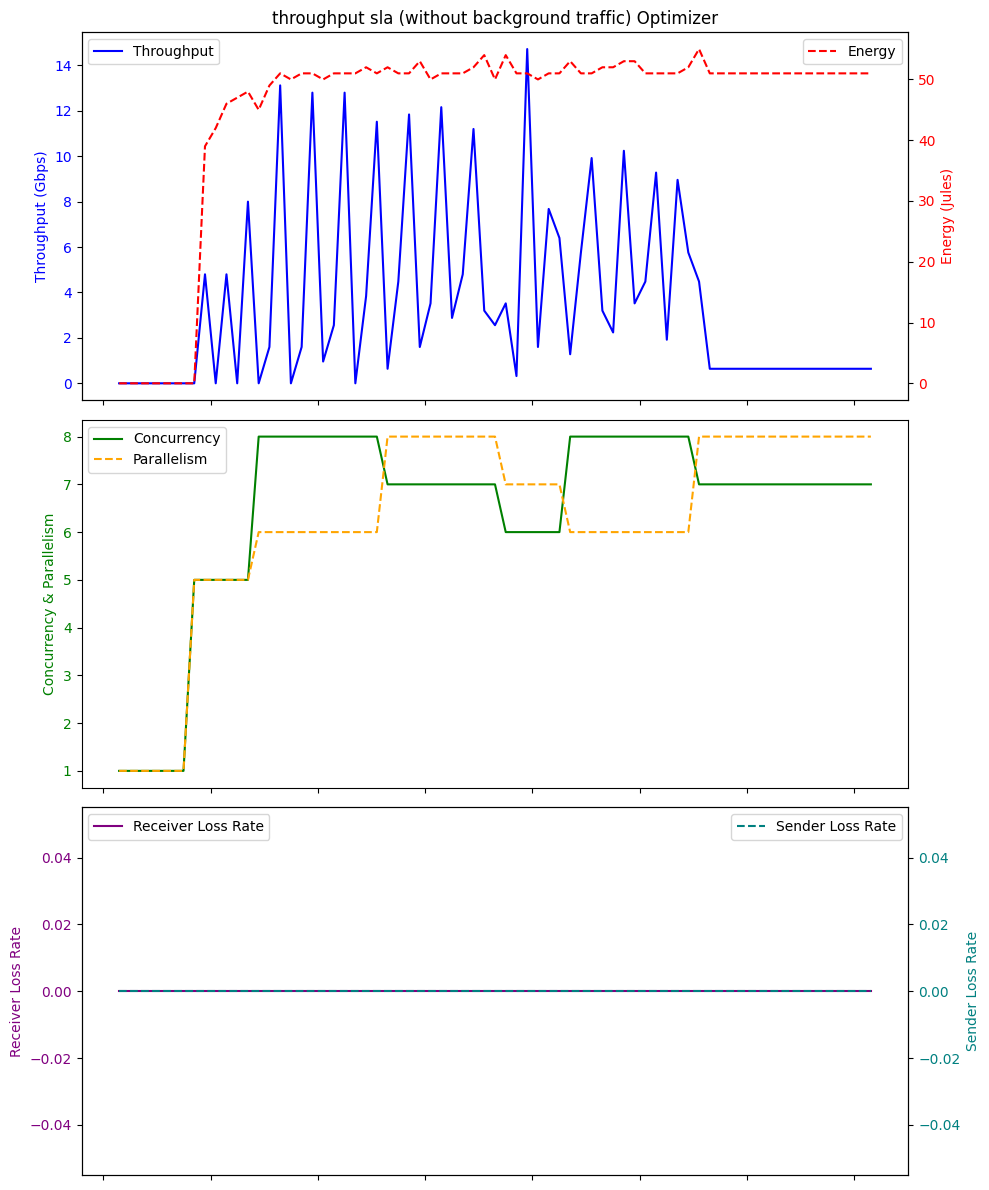

Average Throughput: 3.560563380281689
Total Energy: 44.943661971830984
Total loss rate: 0.0


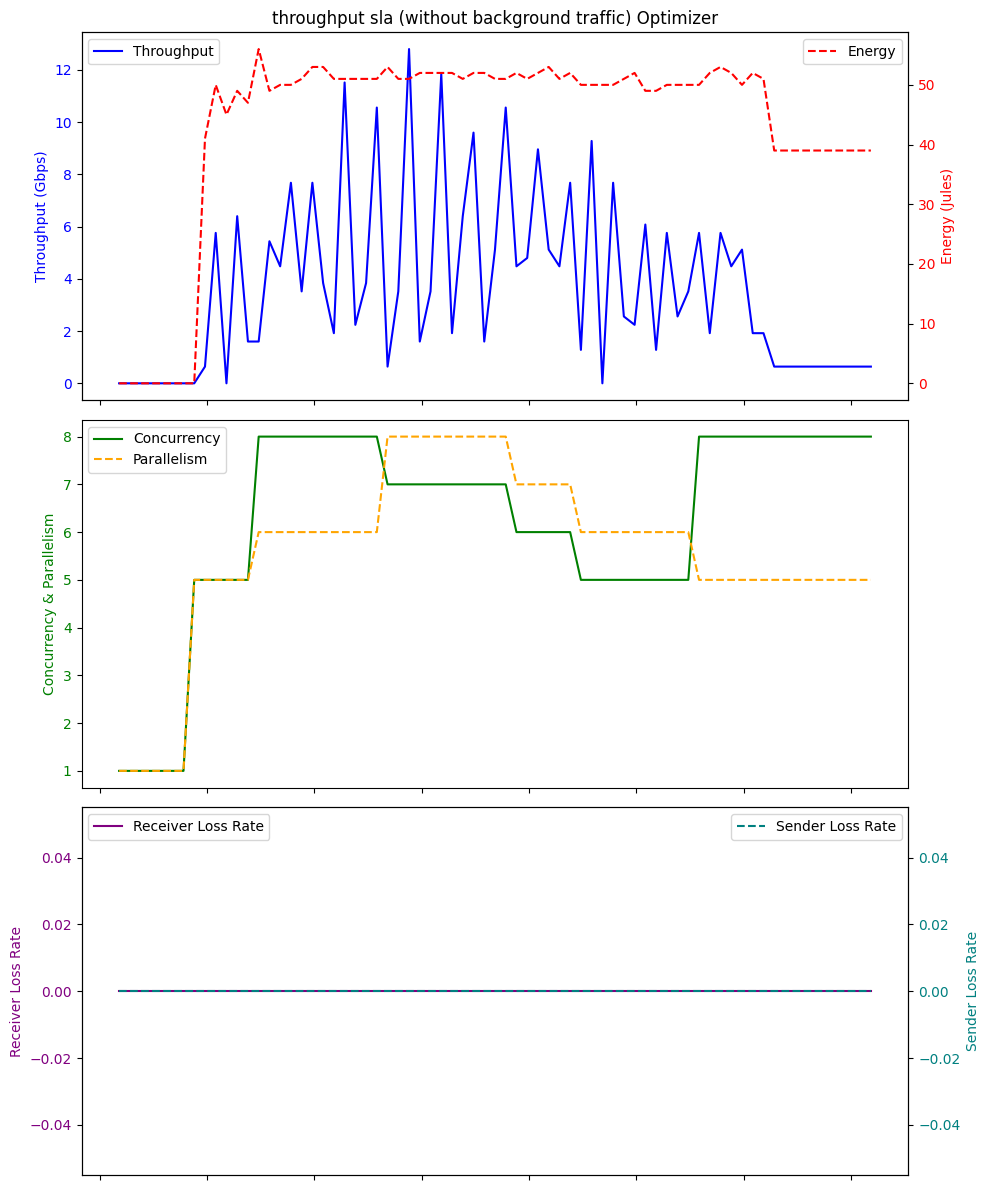

Average Throughput: 3.646197183098591
Total Energy: 43.394366197183096
Total loss rate: 0.0


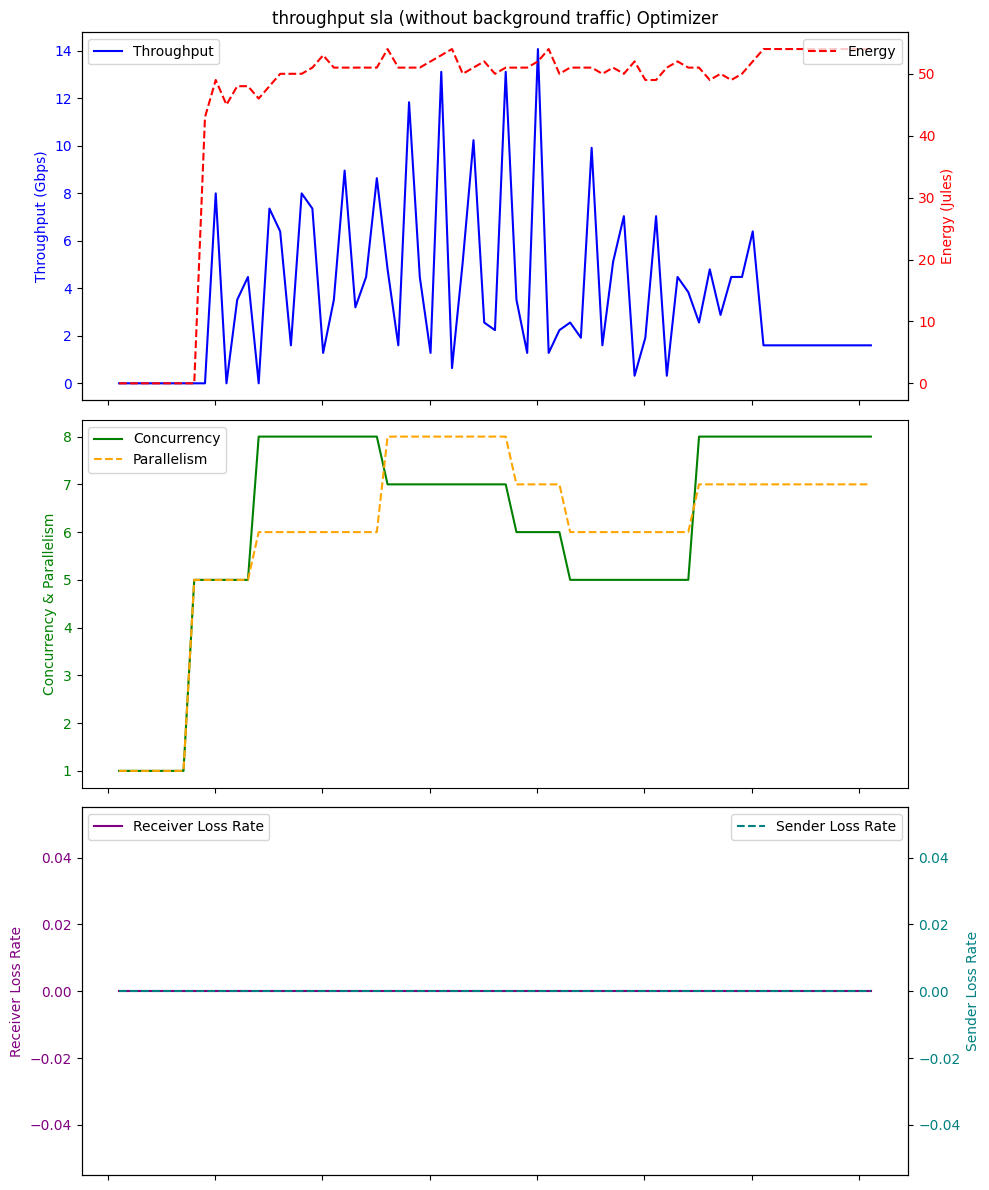

Average Throughput: 3.6552112676056345
Total Energy: 45.309859154929576
Total loss rate: 0.0


In [4]:
directory = './logFileDir/ppo_throughput_sla_MA_ID/'
dfs = process_log_files(directory,"ppo_throughput_sla_MA_ID_")

ppo_throughput_sla_MA_ID_throughput_list=[]
ppo_throughput_sla_MA_ID_energy_list=[]
ppo_throughput_sla_MA_ID_plr_list=[]
# Print or process the dataframes as needed
for df in dfs:
    # print(df)
    # Plotting
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)


    # Top plot with Throughput and Energy
    ax1.plot(df['Time'], df['Throughput'], label='Throughput', color='blue')
    ax1.set_ylabel('Throughput (Gbps)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title('throughput sla (without background traffic) Optimizer')

    ax2_twin = ax1.twinx()
    ax2_twin.plot(df['Time'], df['Energy'], label='Energy', color='red', linestyle='--')
    ax2_twin.set_ylabel('Energy (Jules)', color='red')
    ax2_twin.tick_params(axis='y', labelcolor='red')

    # Bottom plot with Concurrency, Parallelism, and CC
    ax2.plot(df['Time'], df['Concurrency'], label='Concurrency', color='green')
    ax2.plot(df['Time'], df['Parallelism'], label='Parallelism', color='orange', linestyle='--')
    ax2.set_ylabel('Concurrency & Parallelism', color='green')
    ax2.tick_params(axis='y', labelcolor='green')



    # Bottom plot with Receiver Loss Rate and Sender Loss Rate
    ax3.plot(df['Time'], df['LossRate'], label='Receiver Loss Rate', color='purple', linestyle='-')
    ax3.set_ylabel('Receiver Loss Rate', color='purple')
    ax3.tick_params(axis='y', labelcolor='purple')

    ax4_twin = ax3.twinx()
    ax4_twin.plot(df['Time'], df['SenderLR'], label='Sender Loss Rate', color='teal', linestyle='--')
    ax4_twin.set_ylabel('Sender Loss Rate', color='teal')
    ax4_twin.tick_params(axis='y', labelcolor='teal')

    # Formatting the x-axis to show time correctly
#     ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: (datetime.min + timedelta(seconds=x)).strftime('%H:%M:%S')))
#     ax2.set_xticklabels([])
    ax1.set_xticklabels([])
    ax2.set_xticklabels([])
    # Fix for overlapping layouts
    fig.tight_layout()

    # Legend
    ax1.legend(loc='upper left')
    ax2_twin.legend(loc='upper right')
    ax2.legend(loc='upper left')
    ax3.legend(loc='upper left')
    ax4_twin.legend(loc='upper right')
#     plt.savefig('withBT.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

    average_throughput = df['Throughput'].mean()
    print("Average Throughput:", average_throughput)
    total_energy = df['Energy'].mean()
    print("Total Energy:", total_energy)
    total_plr = df['SenderLR'].mean()
    print("Total loss rate:", total_plr)

    ppo_throughput_sla_MA_ID_throughput_list.append(average_throughput)
    ppo_throughput_sla_MA_ID_energy_list.append(total_energy)
    ppo_throughput_sla_MA_ID_plr_list.append(total_plr)


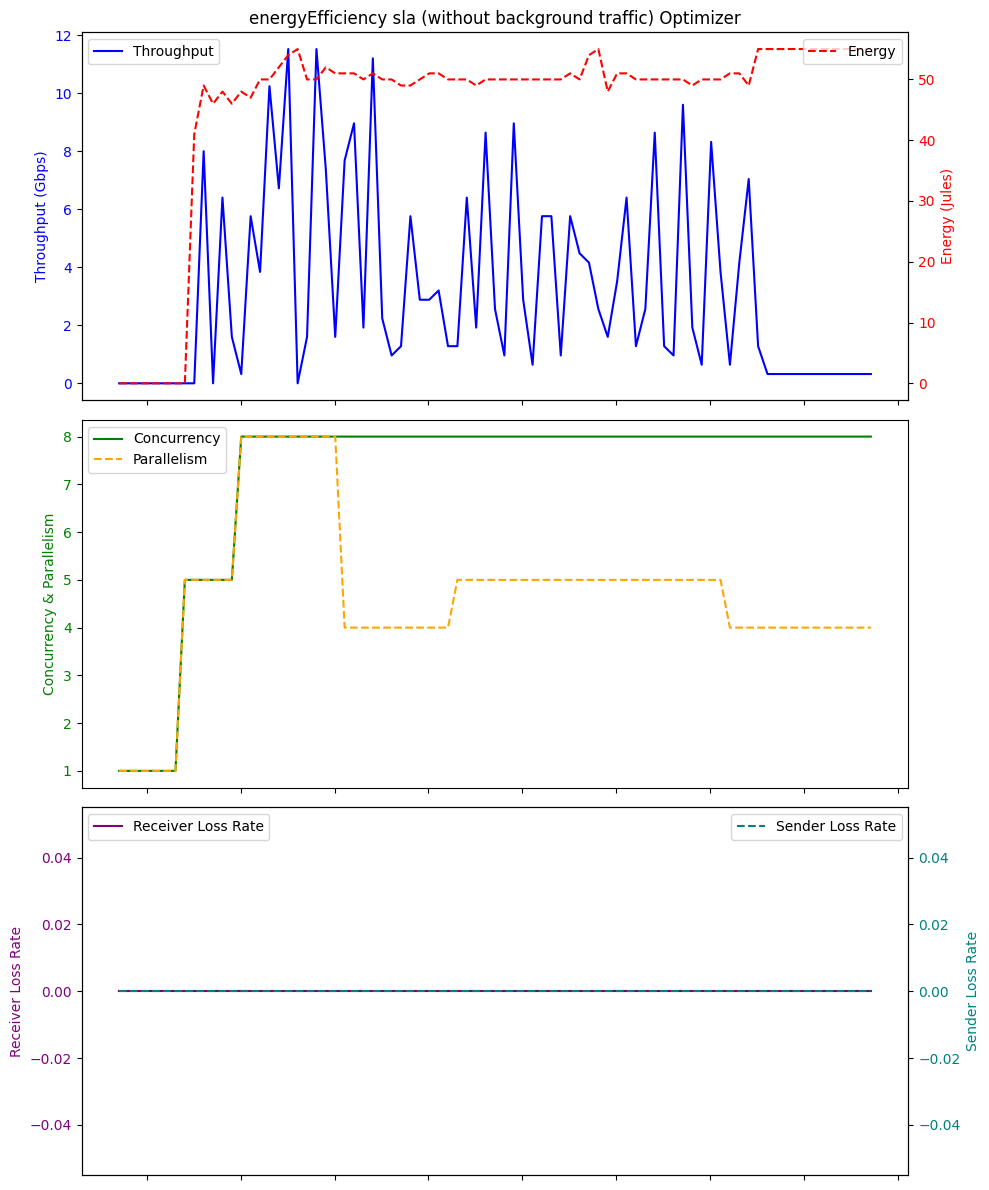

Average Throughput: 3.1841975308641977
Total Energy: 45.876543209876544
Total loss rate: 0.0


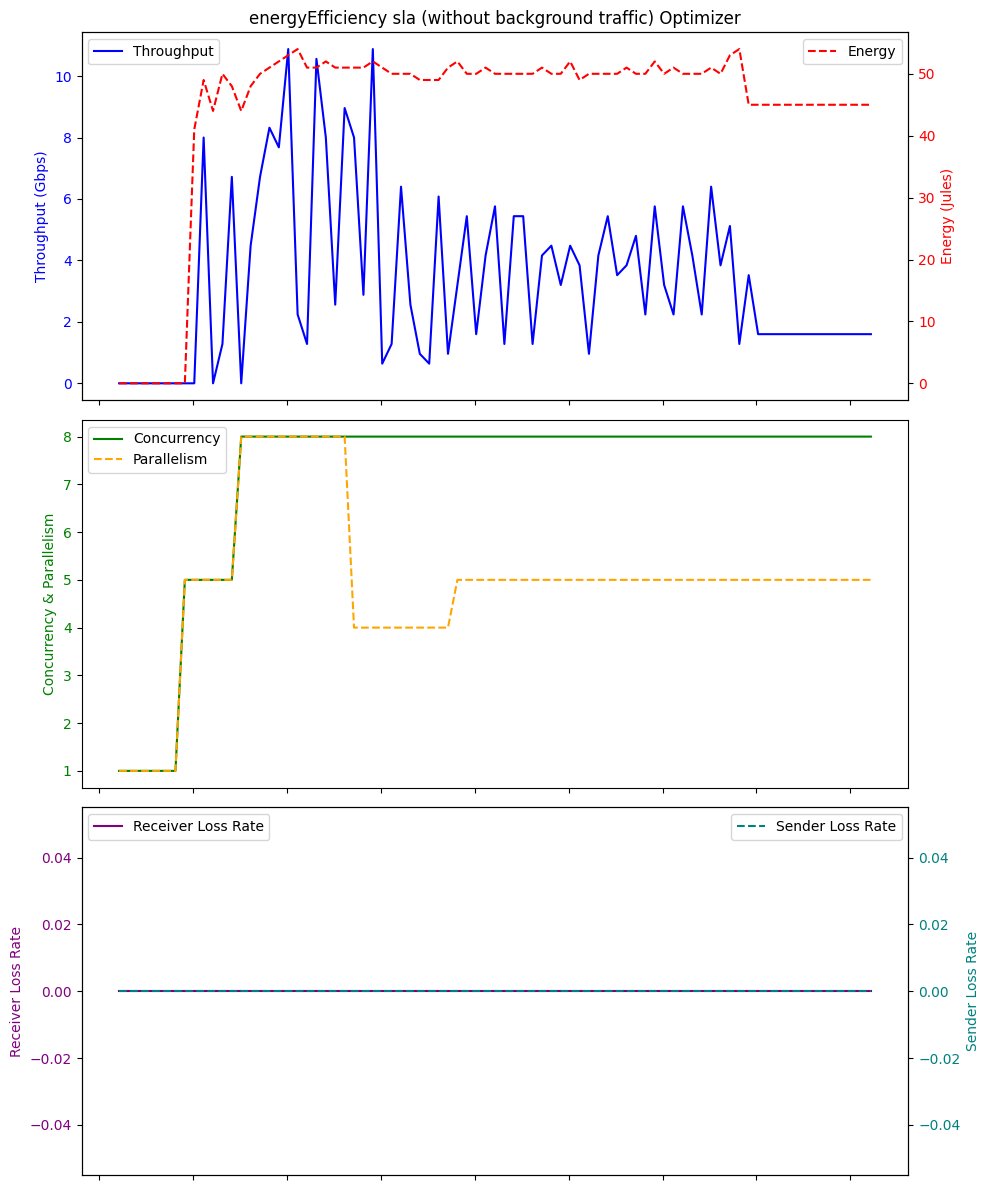

Average Throughput: 3.3580246913580254
Total Energy: 44.32098765432099
Total loss rate: 0.0


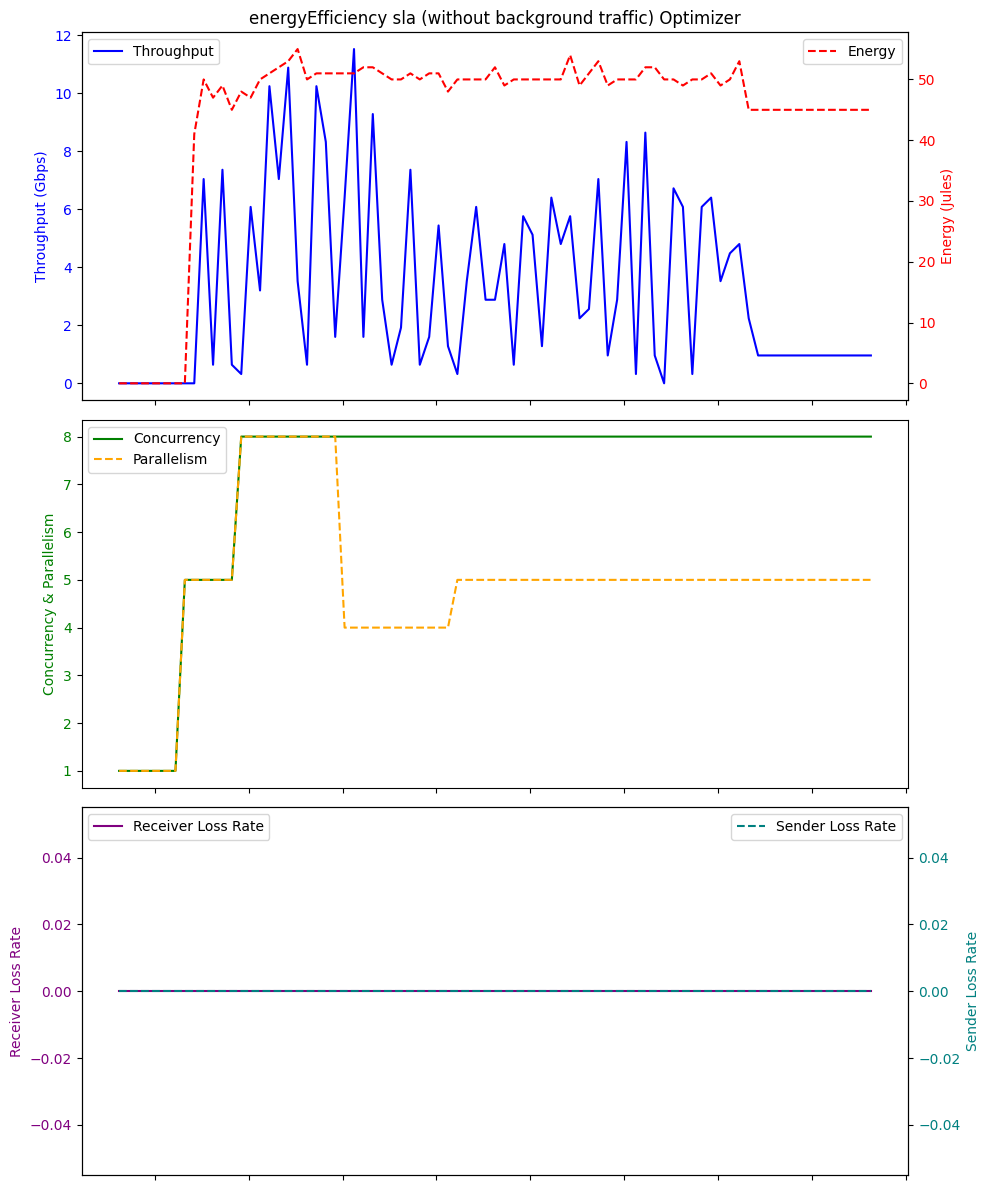

Average Throughput: 3.279012345679012
Total Energy: 44.34567901234568
Total loss rate: 0.0


In [5]:
directory = './logFileDir/ppo_energyEfficiency_sla_MA_ID/'
dfs = process_log_files(directory,"ppo_energyEfficiency_sla_MA_ID_")

ppo_energyEfficiency_sla_MA_ID_throughput_list=[]
ppo_energyEfficiency_sla_MA_ID_energy_list=[]
ppo_energyEfficiency_sla_MA_ID_plr_list=[]
# Print or process the dataframes as needed
for df in dfs:
    # print(df)
    # Plotting
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)


    # Top plot with Throughput and Energy
    ax1.plot(df['Time'], df['Throughput'], label='Throughput', color='blue')
    ax1.set_ylabel('Throughput (Gbps)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title('energyEfficiency sla (without background traffic) Optimizer')

    ax2_twin = ax1.twinx()
    ax2_twin.plot(df['Time'], df['Energy'], label='Energy', color='red', linestyle='--')
    ax2_twin.set_ylabel('Energy (Jules)', color='red')
    ax2_twin.tick_params(axis='y', labelcolor='red')

    # Bottom plot with Concurrency, Parallelism, and CC
    ax2.plot(df['Time'], df['Concurrency'], label='Concurrency', color='green')
    ax2.plot(df['Time'], df['Parallelism'], label='Parallelism', color='orange', linestyle='--')
    ax2.set_ylabel('Concurrency & Parallelism', color='green')
    ax2.tick_params(axis='y', labelcolor='green')



    # Bottom plot with Receiver Loss Rate and Sender Loss Rate
    ax3.plot(df['Time'], df['LossRate'], label='Receiver Loss Rate', color='purple', linestyle='-')
    ax3.set_ylabel('Receiver Loss Rate', color='purple')
    ax3.tick_params(axis='y', labelcolor='purple')

    ax4_twin = ax3.twinx()
    ax4_twin.plot(df['Time'], df['SenderLR'], label='Sender Loss Rate', color='teal', linestyle='--')
    ax4_twin.set_ylabel('Sender Loss Rate', color='teal')
    ax4_twin.tick_params(axis='y', labelcolor='teal')

    # Formatting the x-axis to show time correctly
#     ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: (datetime.min + timedelta(seconds=x)).strftime('%H:%M:%S')))
#     ax2.set_xticklabels([])
    ax1.set_xticklabels([])
    ax2.set_xticklabels([])
    # Fix for overlapping layouts
    fig.tight_layout()

    # Legend
    ax1.legend(loc='upper left')
    ax2_twin.legend(loc='upper right')
    ax2.legend(loc='upper left')
    ax3.legend(loc='upper left')
    ax4_twin.legend(loc='upper right')
#     plt.savefig('withBT.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

    average_throughput = df['Throughput'].mean()
    print("Average Throughput:", average_throughput)
    total_energy = df['Energy'].mean()
    print("Total Energy:", total_energy)
    total_plr = df['SenderLR'].mean()
    print("Total loss rate:", total_plr)

    ppo_energyEfficiency_sla_MA_ID_throughput_list.append(average_throughput)
    ppo_energyEfficiency_sla_MA_ID_energy_list.append(total_energy)
    ppo_energyEfficiency_sla_MA_ID_plr_list.append(total_plr)


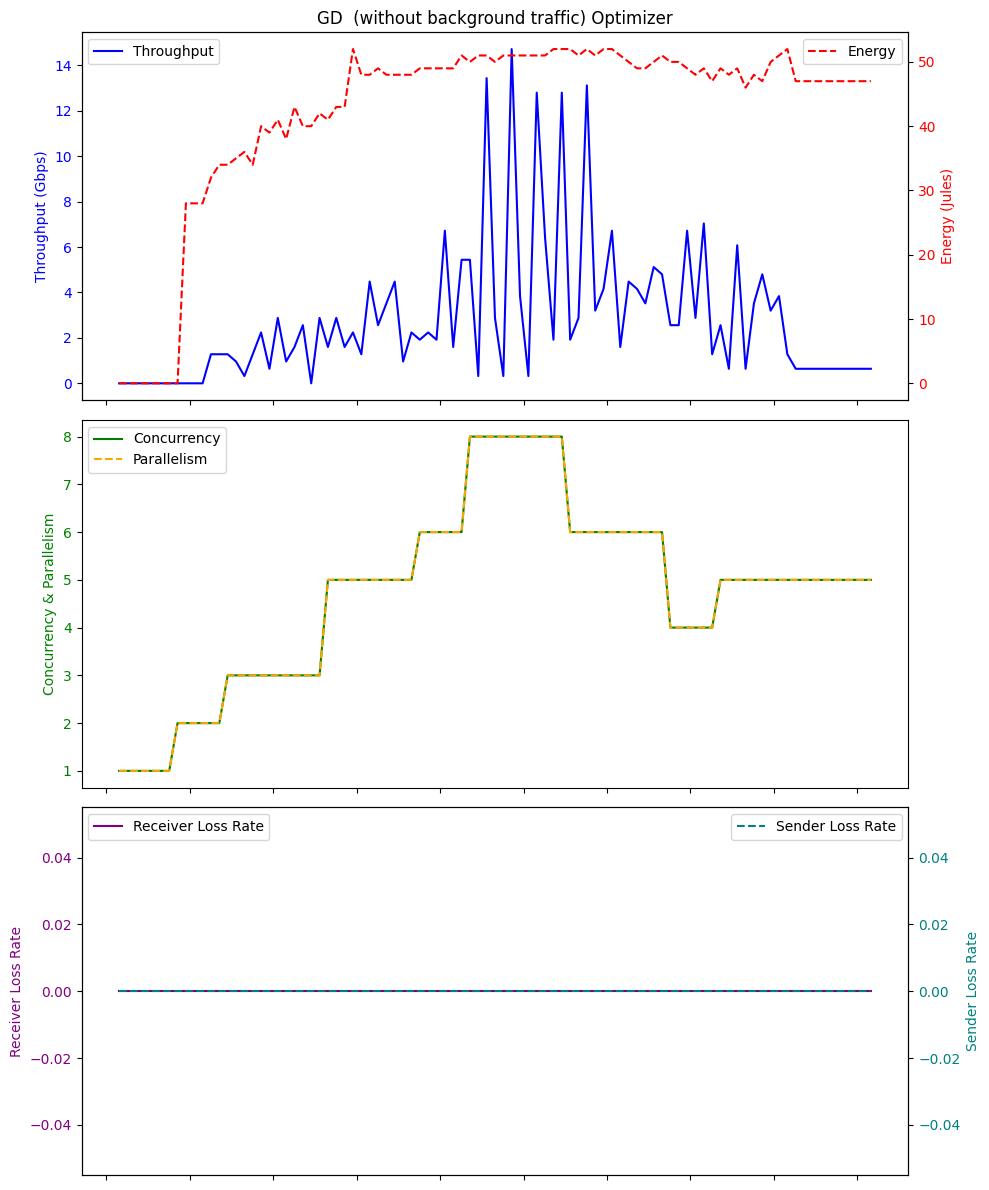

Average Throughput: 2.7991208791208786
Total Energy: 42.2967032967033
Total loss rate: 0.0


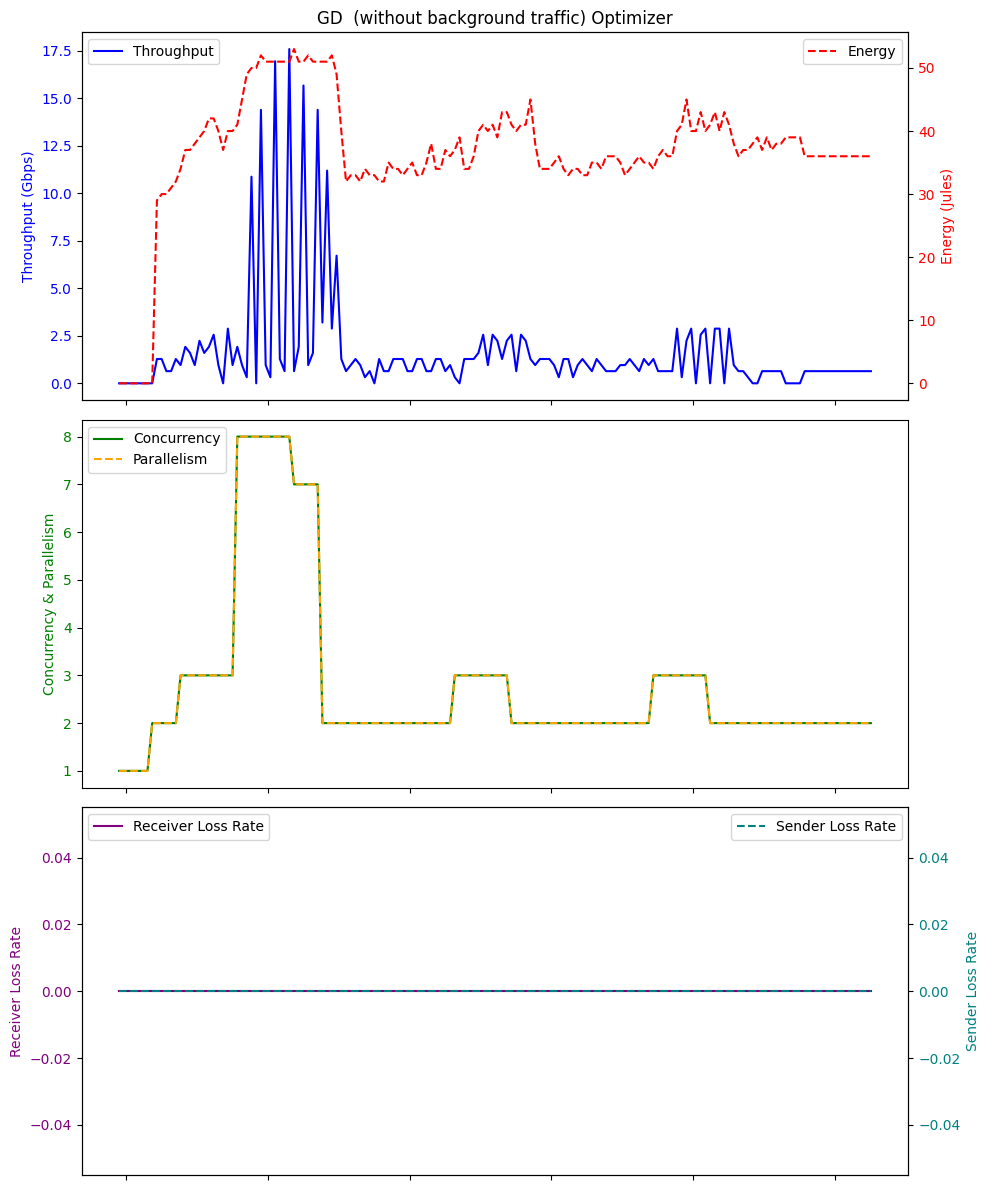

Average Throughput: 1.6460000000000001
Total Energy: 36.6875
Total loss rate: 0.0


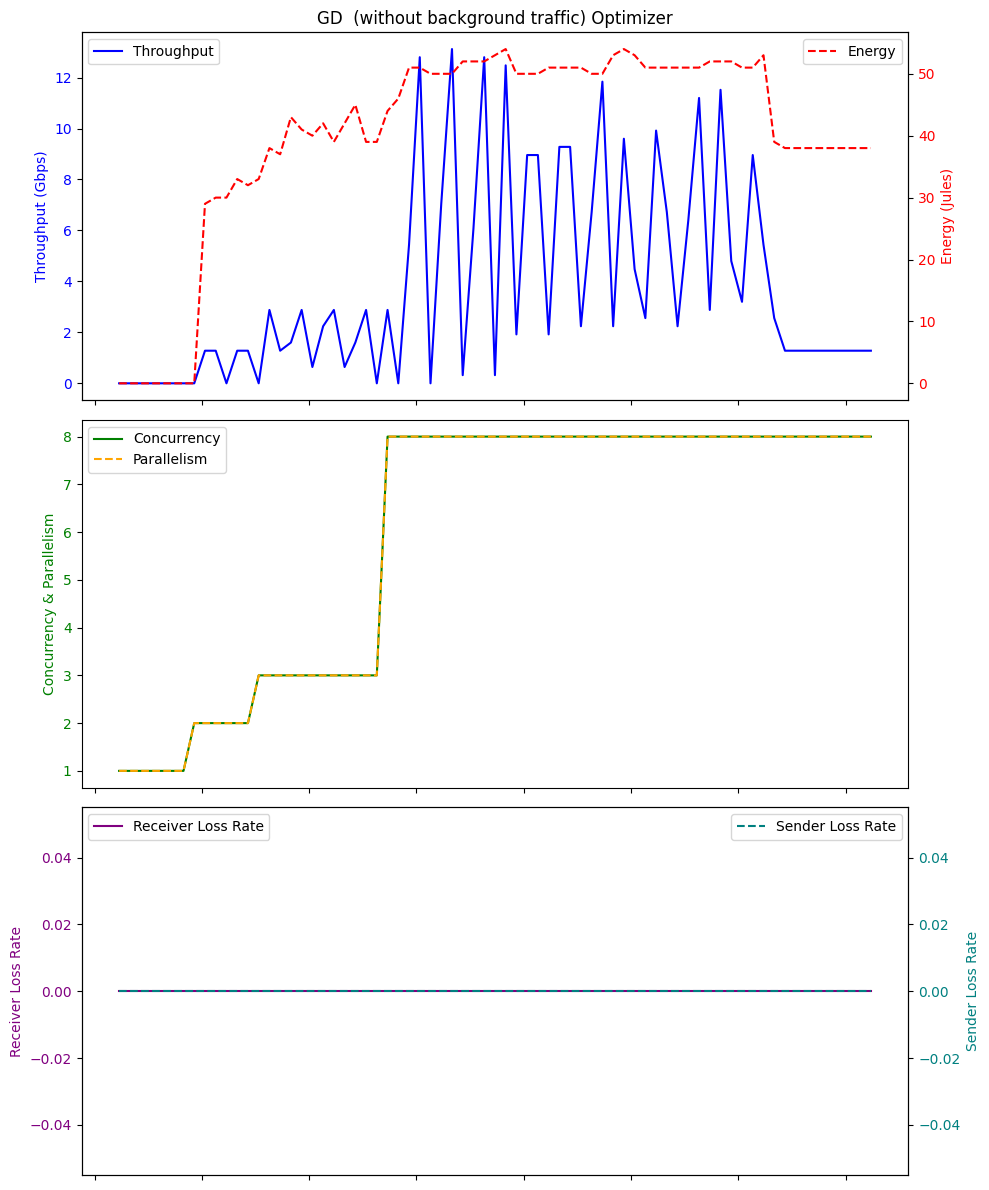

Average Throughput: 3.736338028169012
Total Energy: 40.12676056338028
Total loss rate: 0.0


In [6]:
directory = './logFileDir/gd_MA_ID/'
dfs = process_log_files(directory,"gd_MA_ID_")

gd_MA_ID_throughput_list=[]
gd_MA_ID_energy_list=[]
gd_MA_ID_plr_list=[]
# Print or process the dataframes as needed
for df in dfs:
    # print(df)
    # Plotting
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)


    # Top plot with Throughput and Energy
    ax1.plot(df['Time'], df['Throughput'], label='Throughput', color='blue')
    ax1.set_ylabel('Throughput (Gbps)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title('GD  (without background traffic) Optimizer')

    ax2_twin = ax1.twinx()
    ax2_twin.plot(df['Time'], df['Energy'], label='Energy', color='red', linestyle='--')
    ax2_twin.set_ylabel('Energy (Jules)', color='red')
    ax2_twin.tick_params(axis='y', labelcolor='red')

    # Bottom plot with Concurrency, Parallelism, and CC
    ax2.plot(df['Time'], df['Concurrency'], label='Concurrency', color='green')
    ax2.plot(df['Time'], df['Parallelism'], label='Parallelism', color='orange', linestyle='--')
    ax2.set_ylabel('Concurrency & Parallelism', color='green')
    ax2.tick_params(axis='y', labelcolor='green')



    # Bottom plot with Receiver Loss Rate and Sender Loss Rate
    ax3.plot(df['Time'], df['LossRate'], label='Receiver Loss Rate', color='purple', linestyle='-')
    ax3.set_ylabel('Receiver Loss Rate', color='purple')
    ax3.tick_params(axis='y', labelcolor='purple')

    ax4_twin = ax3.twinx()
    ax4_twin.plot(df['Time'], df['SenderLR'], label='Sender Loss Rate', color='teal', linestyle='--')
    ax4_twin.set_ylabel('Sender Loss Rate', color='teal')
    ax4_twin.tick_params(axis='y', labelcolor='teal')

    # Formatting the x-axis to show time correctly
#     ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: (datetime.min + timedelta(seconds=x)).strftime('%H:%M:%S')))
#     ax2.set_xticklabels([])
    ax1.set_xticklabels([])
    ax2.set_xticklabels([])
    # Fix for overlapping layouts
    fig.tight_layout()

    # Legend
    ax1.legend(loc='upper left')
    ax2_twin.legend(loc='upper right')
    ax2.legend(loc='upper left')
    ax3.legend(loc='upper left')
    ax4_twin.legend(loc='upper right')
#     plt.savefig('withBT.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

    average_throughput = df['Throughput'].mean()
    print("Average Throughput:", average_throughput)
    total_energy = df['Energy'].mean()
    print("Total Energy:", total_energy)
    total_plr = df['SenderLR'].mean()
    print("Total loss rate:", total_plr)

    gd_MA_ID_throughput_list.append(average_throughput)
    gd_MA_ID_energy_list.append(total_energy)
    gd_MA_ID_plr_list.append(total_plr)


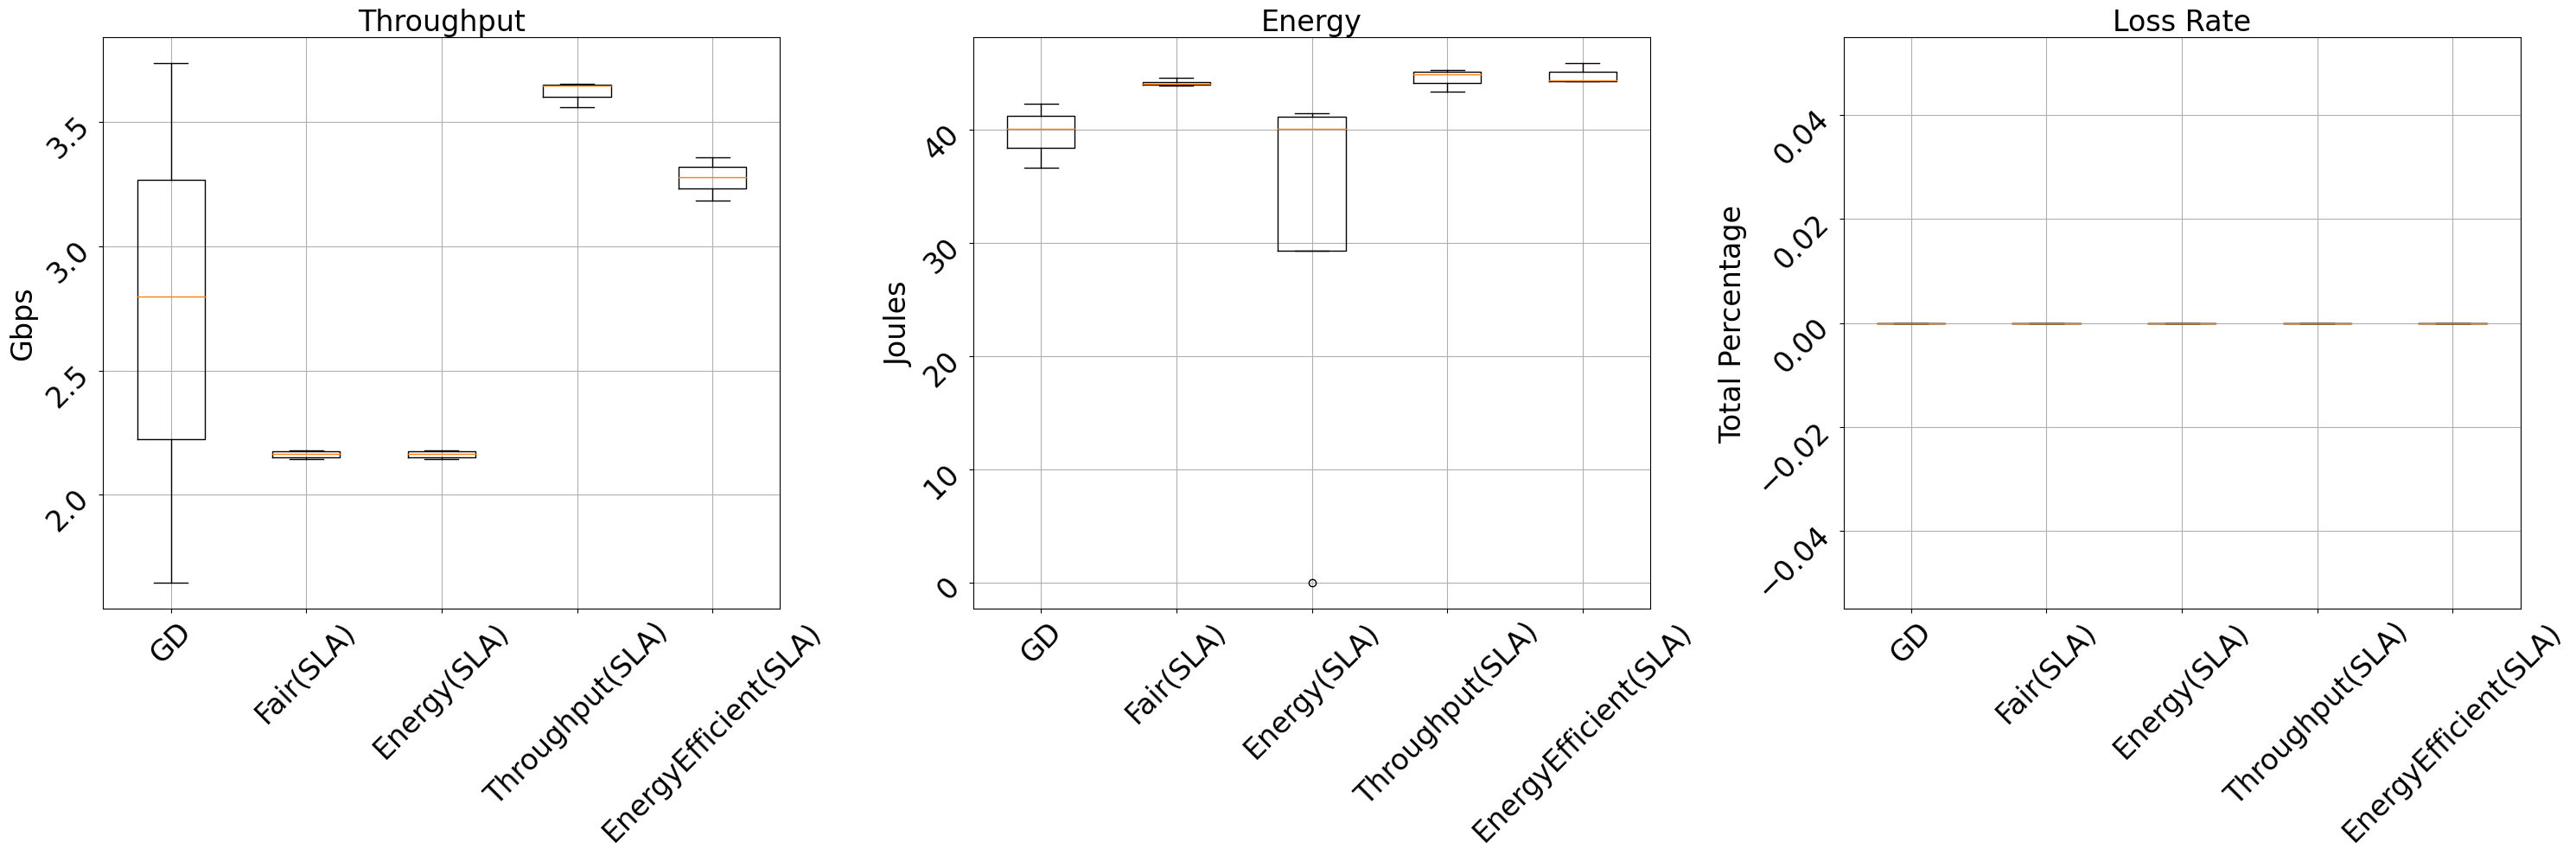

In [7]:
result_dictionary={"Throughput":[gd_MA_ID_throughput_list,ppo_score_sla_MA_ID_throughput_list,ppo_score_sla_MA_ID_throughput_list,ppo_throughput_sla_MA_ID_throughput_list,ppo_energyEfficiency_sla_MA_ID_throughput_list],"Energy":[gd_MA_ID_energy_list,ppo_score_sla_MA_ID_energy_list,ppo_energy_sla_MA_ID_energy_list,ppo_throughput_sla_MA_ID_energy_list,ppo_energyEfficiency_sla_MA_ID_energy_list],"lossRate":[gd_MA_ID_plr_list,ppo_score_sla_MA_ID_plr_list,ppo_energy_sla_MA_ID_plr_list,ppo_throughput_sla_MA_ID_plr_list,ppo_energyEfficiency_sla_MA_ID_plr_list]}
import matplotlib.pyplot as plt

labels = ['GD','Fair(SLA)','Energy(SLA)','Throughput(SLA)','EnergyEfficient(SLA)']

# Assuming result_dictionary is already defined with the relevant data
# result_dictionary = {...}

# Creating subplots
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

# Font size for the ticks
tick_font_size = 24  # You can change this value as needed

# Plotting Throughput
axes[0].boxplot(result_dictionary['Throughput'], labels=labels)
axes[0].set_title('Throughput',fontsize=24)
axes[0].set_ylabel('Gbps',fontsize=24)
axes[0].tick_params(axis='both', which='major', labelsize=tick_font_size,labelrotation=45)  # Set tick font size
axes[0].grid(True)  # Adding grid

# Plotting Energy
axes[1].boxplot(result_dictionary['Energy'], labels=labels)
axes[1].set_title('Energy',fontsize=24)
axes[1].set_ylabel('Joules',fontsize=24)
axes[1].tick_params(axis='both', which='major', labelsize=tick_font_size,labelrotation=45)  # Set tick font size
axes[1].grid(True)  # Adding grid

# Plotting Loss Rate
axes[2].boxplot(result_dictionary['lossRate'], labels=labels)
axes[2].set_title('Loss Rate',fontsize=24)
axes[2].set_ylabel('Total Percentage',fontsize=24)
axes[2].tick_params(axis='both', which='major', labelsize=tick_font_size,labelrotation=45)  # Set tick font size
axes[2].grid(True)  # Adding grid

plt.tight_layout()
plt.show()
